In [21]:
from headless_run import main, load_ENV
import numpy as np

def avg(li):
    return sum(li) / len(li)

In [22]:
steps_PSO = []
avg_dists_PSO = []
min_dists_PSO = []
for _ in range(31):
    ENV = load_ENV("Corner Long", True)
    step, distances = main("MultiPSO", virtual_dt=1.5, horizon=5, ENV = ENV)
    steps_PSO.append(step)
    avg_dists_PSO.append(avg(distances))
    min_dists_PSO.append(min(distances))
avg_step_PSO = avg(steps_PSO)
avg2_dist_PSO = avg(avg_dists_PSO)
avg_min_dist_PSO = avg(min_dists_PSO)

loading Corner Long
# 1
fit=3167.983916852112 | [20.65611001 22.2       ]
__call__ 0.10909795761108398
# 2
fit=3063.518182225293 | [22.2 22.2]
__call__ 0.10009121894836426
# 3
fit=3010.5591294162537 | [22.2        22.13799533]
__call__ 0.10209321975708008
# 4
fit=2760.1759008177423 | [22.19313844 22.19899187]
__call__ 0.0990903377532959
# 5
fit=2700.289012846242 | [22.2        22.19882267]
__call__ 0.09708762168884277
# 6
fit=2706.95068613735 | [22.1880535 22.1849211]
__call__ 0.10109138488769531
# 7
fit=2662.0206909052704 | [22.1656386  22.14074024]
__call__ 0.10809731483459473
# 8
fit=2656.810990729172 | [22.14887192 22.10022069]
__call__ 0.10109305381774902
# 9
fit=2606.124324408752 | [22.2        22.02081619]
__call__ 0.0990900993347168
# 10
fit=2659.362174578798 | [22.03570324 22.07332065]
__call__ 0.10122060775756836
# 11
fit=2684.625482651515 | [21.64382574 21.90432652]
__call__ 0.0970914363861084
# 12
fit=2560.688858344448 | [21.48805876 22.06164604]
__call__ 0.0990881919860839

In [23]:
print(avg_step_PSO)
print(avg2_dist_PSO)
print(avg_min_dist_PSO)

223.1290322580645
2.939089681519237
1.8580210459537274


In [24]:
steps_DWA = []
avg_dists_DWA = []
min_dists_DWA = []
for _ in range(31):
    ENV = load_ENV("Corner Long", True)
    step, distances = main("DWA", ENV = ENV, virtual_dt=1.5)
    steps_DWA.append(step)
    avg_dists_DWA.append(sum(distances) / len(distances))
    min_dists_DWA.append(min(distances))
avg_step_DWA = avg(steps_DWA)
avg2_dist_DWA = avg(avg_dists_DWA)
avg_min_dist_DWA = avg(min_dists_DWA)

loading Corner Long
# 1
best: (19.86315789473684, 0.29210526315789487) 13.63926914702369
# 2
best: (-10.515789473684212, -1.4605263157894735) 13.366511517374306
# 3
best: (19.86315789473684, 0.29210526315789487) 14.708562402591657
# 4
best: (19.86315789473684, 0.29210526315789487) 14.647955845861812
# 5
best: (19.86315789473684, 0.29210526315789487) 14.346937098889876
# 6
best: (19.86315789473684, 0.29210526315789487) 14.31885267379249
# 7
best: (19.86315789473684, 0.29210526315789487) 13.71572697375445
# 8
best: (19.86315789473684, 0.29210526315789487) 13.478779968988421
# 9
best: (-10.515789473684212, -1.4605263157894735) 13.364067687917725
# 10
best: (19.86315789473684, 0.29210526315789487) 14.747840084210505
# 11
best: (19.86315789473684, 0.29210526315789487) 14.638489030776501
# 12
best: (19.86315789473684, 0.29210526315789487) 14.231146263919584
# 13
best: (19.86315789473684, 0.29210526315789487) 14.293203745887531
# 14
best: (19.86315789473684, 0.29210526315789487) 14.1088399032

In [25]:
print(avg_step_DWA)
print(avg2_dist_DWA)
print(avg_min_dist_DWA)

346.51612903225805
2.932538549746159
1.920343412429849


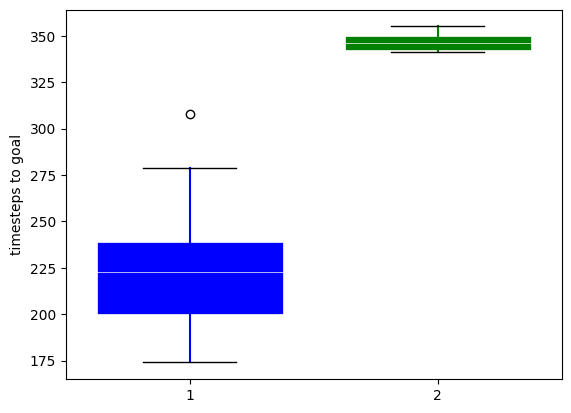

In [26]:
import matplotlib.pyplot as plt

def box_plot(ax, vals, pos, color):
    ax.boxplot(vals, positions=[pos], widths=0.75, patch_artist=True,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": color, "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": color, "linewidth": 1.5})
    
def box_plot_PSO(ax, vals):
    box_plot(ax, vals, 1, "blue")

def box_plot_DWA(ax, vals):
    box_plot(ax, vals, 2, "green")

fig, ax = plt.subplots()
box_plot_PSO(ax, steps_PSO)
box_plot_DWA(ax, steps_DWA)
ax.set_ylabel("timesteps to goal")
plt.show()

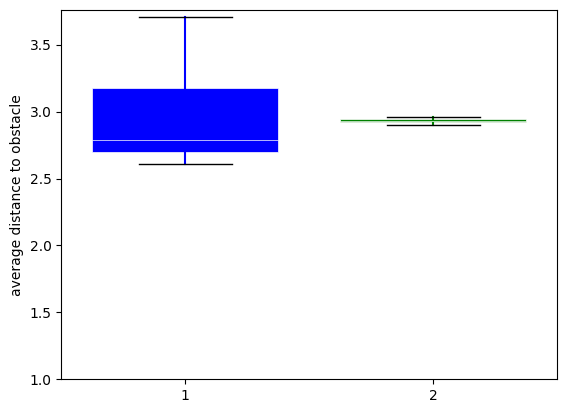

In [27]:
fig, ax = plt.subplots()
box_plot_PSO(ax, avg_dists_PSO)
box_plot_DWA(ax, avg_dists_DWA)
ax.set_ylim(ymin=1)
ax.set_ylabel("average distance to obstacle")
plt.show()

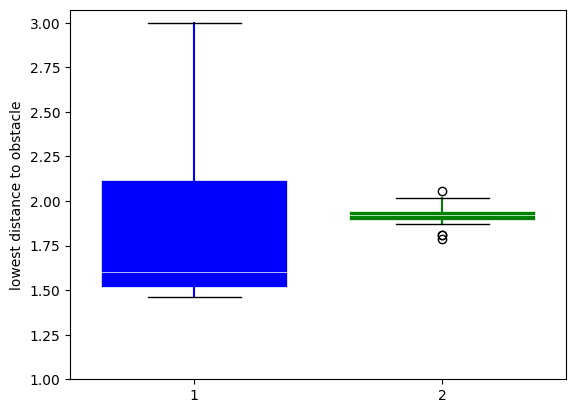

In [28]:
fig, ax = plt.subplots()
box_plot_PSO(ax, min_dists_PSO)
box_plot_DWA(ax, min_dists_DWA)
ax.set_ylim(ymin=1)
ax.set_ylabel("lowest distance to obstacle")
plt.show()